# Proyecto Salud Mental y Tasas de Suicidios 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Modelo

In [2]:
df_suicide = pd.read_csv("./world-suicide/master.csv")
df_suicide = df_suicide.drop(['country-year', 'HDI for year'], axis=1)
df_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [3]:
df_suicide.rename(columns={
    'suicides/100k pop': 'Suicides',
    'country': 'Country',
    'year': 'Year',
    'population': 'Population',
    'age': 'Age',
    'sex': 'Sex',
    'generation': 'Generation',
    ' gdp_for_year ($) ': 'GDP_Year',
    'gdp_per_capita ($)': 'GDP_Capita'}, 
    inplace=True)
del df_suicide["suicides_no"]
del df_suicide["GDP_Year"]
del df_suicide["Generation"]
del df_suicide["Population"]
del df_suicide["Sex"]
del df_suicide["Age"]
df_suicide

,Country,Year,Suicides,GDP_Capita
0,Albania,1987,6.71,796
1,Albania,1987,5.19,796
2,Albania,1987,4.83,796
3,Albania,1987,4.59,796
4,Albania,1987,3.28,796
...,...,...,...,...
27815,Uzbekistan,2014,2.96,2309
27816,Uzbekistan,2014,2.58,2309
27817,Uzbekistan,2014,2.17,2309
27818,Uzbekistan,2014,1.67,2309


In [4]:
is_2015 =  df_suicide['Year']==2015
df_2015 = df_suicide[is_2015]
df_2015

,Country,Year,Suicides,GDP_Capita
576,Antigua and Barbuda,2015,15.62,14853
577,Antigua and Barbuda,2015,0.00,14853
578,Antigua and Barbuda,2015,0.00,14853
579,Antigua and Barbuda,2015,0.00,14853
580,Antigua and Barbuda,2015,0.00,14853
...,...,...,...,...
27551,Uruguay,2015,9.91,16696
27552,Uruguay,2015,8.63,16696
27553,Uruguay,2015,6.66,16696
27554,Uruguay,2015,1.19,16696


In [5]:
is_2016 =  df_suicide['Year']==2016
df_2016 = df_suicide[is_2016]
df_2016

,Country,Year,Suicides,GDP_Capita
1248,Armenia,2016,19.37,3788
1249,Armenia,2016,6.73,3788
1250,Armenia,2016,4.56,3788
1251,Armenia,2016,2.47,3788
1252,Armenia,2016,1.95,3788
...,...,...,...,...
25307,Thailand,2016,4.34,6713
25308,Thailand,2016,3.67,6713
25309,Thailand,2016,3.53,6713
25310,Thailand,2016,2.47,6713


In [6]:
country_rate = df_2015.groupby('Country').Suicides.mean().reset_index()

In [7]:
country_gdp_cap = df_2015.groupby('Country').GDP_Capita.mean().reset_index()

In [8]:
new_2015 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2015["GDP_Capita"] = new_2015["GDP_Capita"]/10000
new_2015["Year"] = 2015
new_2015

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,1.301667,1.4853,2015
1,Argentina,9.344167,1.4981,2015
2,Armenia,3.773333,0.3775,2015
3,Australia,12.848333,6.0656,2015
4,Austria,16.218333,4.6484,2015
...,...,...,...,...
57,Turkmenistan,2.373333,0.7326,2015
58,Ukraine,20.393333,0.2256,2015
59,United Kingdom,7.228333,4.7240,2015
60,United States,14.617500,6.0387,2015


In [9]:
country_rate = df_2016.groupby('Country').Suicides.mean().reset_index()

In [10]:
country_gdp_cap = df_2016.groupby('Country').GDP_Capita.mean().reset_index()

In [11]:
new_2016 = pd.merge(country_rate, country_gdp_cap, on='Country')
new_2016["GDP_Capita"] = new_2016["GDP_Capita"]/10000
new_2016["Year"] = 2016
new_2016

,Country,Suicides,GDP_Capita,Year
0,Armenia,4.056,0.3788,2016
1,Austria,18.323,4.6976,2016
2,Croatia,21.356,1.2905,2016
3,Cyprus,4.715,2.5098,2016
4,Czech Republic,16.176,1.9505,2016
5,Grenada,0.000,1.0838,2016
6,Hungary,24.134,1.3448,2016
7,Iceland,13.807,6.4708,2016
8,Lithuania,36.172,1.5742,2016
9,Mauritius,9.930,1.0570,2016


In [12]:
new_suicide = pd.concat([new_2015, new_2016])
new_suicide

,Country,Suicides,GDP_Capita,Year
0,Antigua and Barbuda,1.301667,1.4853,2015
1,Argentina,9.344167,1.4981,2015
2,Armenia,3.773333,0.3775,2015
3,Australia,12.848333,6.0656,2015
4,Austria,16.218333,4.6484,2015
...,...,...,...,...
11,Netherlands,12.739000,4.8108,2016
12,Qatar,1.643000,6.2484,2016
13,Romania,11.633000,1.0020,2016
14,Sweden,13.884000,5.5594,2016


In [13]:
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [14]:
df_happiness.rename(columns={
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
},inplace=True)
del df_happiness["Rank"]
del df_happiness["Region"]
df_happiness

,Year,Country,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,2015,Switzerland,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,Iceland,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,Denmark,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,Norway,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,Canada,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380
761,2019,Rwanda,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334
762,2019,Tanzania,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231
763,2019,Afghanistan,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203


In [15]:
df_final = pd.merge(new_suicide, df_happiness, on=['Country', 'Year'])
df_final

,Country,Suicides,GDP_Capita,Year,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,Argentina,9.344167,1.4981,2015,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,6.574
1,Armenia,3.773333,0.3775,2015,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,4.350
2,Australia,12.848333,6.0656,2015,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.284
3,Austria,16.218333,4.6484,2015,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,7.200
4,Belgium,16.388333,4.2830,2015,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.937
...,...,...,...,...,...,...,...,...,...,...,...
63,Netherlands,12.739000,4.8108,2016,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,7.339
64,Qatar,1.643000,6.2484,2016,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,6.375
65,Romania,11.633000,1.0020,2016,1.16970,0.72803,0.67602,0.36712,0.00679,0.12889,5.528
66,Sweden,13.884000,5.5594,2016,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,7.291


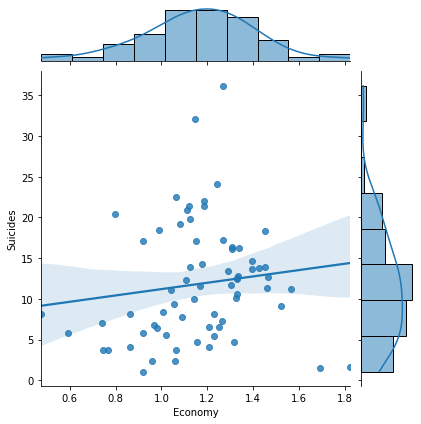

In [16]:
sns.jointplot(x="Economy", y="Suicides", data=df_final, kind="reg")
plt.show()

In [17]:
X = df_final[["Economy"]]
y = df_final[["Suicides"]]

In [18]:
reg = LinearRegression()
model = reg.fit(X,y)
print("Intercept: ", model.intercept_[0])
print("Coef: ", model.coef_[0][0])
print("Rscore: ", model.score(X, y))

Intercept:  7.307476363762612
Coef:  3.893708012298586
Rscore:  0.01742056369603029


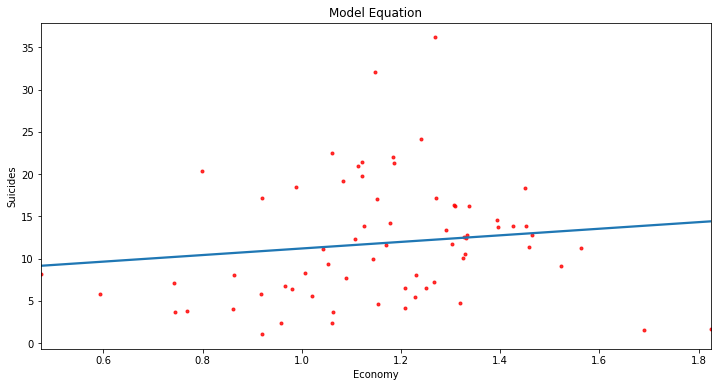

In [19]:
plt.figure(figsize=(12, 6))
g = sns.regplot(x=df_final["Economy"], y=df_final["Suicides"], ci=None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Suicides")
g.set_xlabel("Economy")
plt.show()

In [20]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("La cantidad de suicidios de un pais con Economy GDP ", g[0], ": ", model.predict([g])[0][0])

La cantidad de suicidios de un pais con Economy GDP  0.25 :  8.28090336683726
La cantidad de suicidios de un pais con Economy GDP  0.5 :  9.254330369911905
La cantidad de suicidios de un pais con Economy GDP  0.75 :  10.227757372986552
La cantidad de suicidios de un pais con Economy GDP  1.0 :  11.201184376061198
La cantidad de suicidios de un pais con Economy GDP  1.25 :  12.174611379135845
La cantidad de suicidios de un pais con Economy GDP  1.5 :  13.14803838221049


In [21]:
def linear_reg(col, text, prdctn):
    
    sns.jointplot(x=col,y="Suicides", data=df_final, kind="reg")
    plt.show()
    
    X = df_final[[col]]
    y = df_final[["Suicides"]]
    reg = LinearRegression()
    model = reg.fit(X, y)
    
    # prediction
    plt.figure(figsize=(12, 6))
    g = sns.regplot(x=df_final[col], y=df_final["Suicides"], ci=None, scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("Suicides")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]])[0][0])

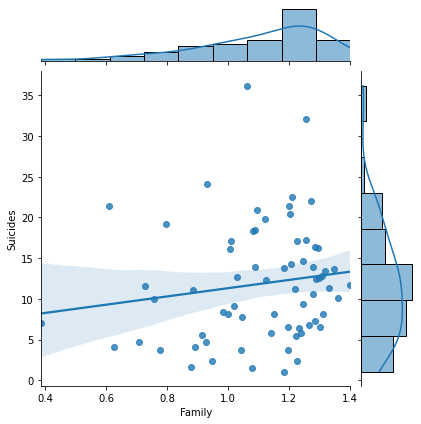

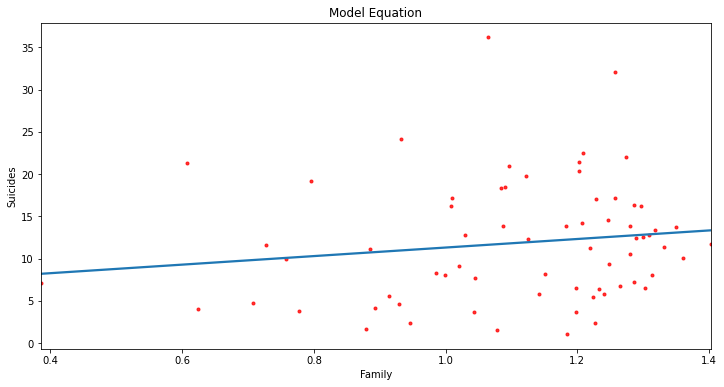

La cantidad de suicidios de un pais con Family 2 :  16.369279127516563


In [22]:
linear_reg("Family", "La cantidad de suicidios de un pais con Family 2", 2)

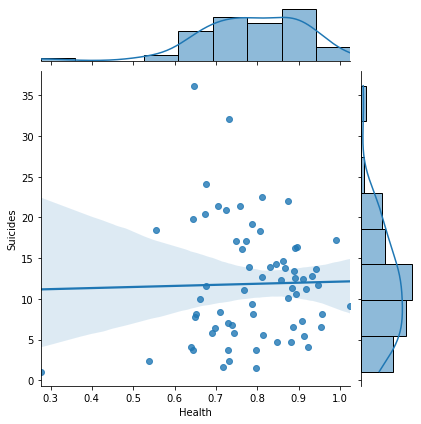

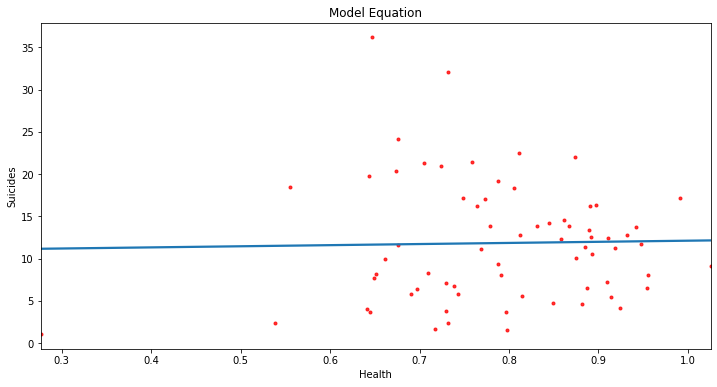

La cantidad de suicidios de un pais con Health 1.20 :  12.385564140446467


In [23]:
linear_reg("Health","La cantidad de suicidios de un pais con Health 1.20", 1.20)

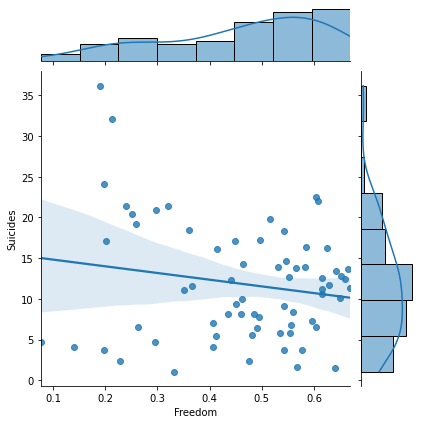

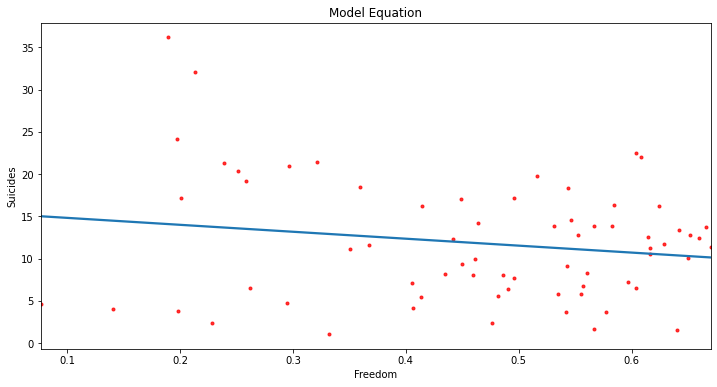

La cantidad de suicidios de un pais con Freedom 0.89 :  8.328606886830016


In [24]:
linear_reg("Freedom", "La cantidad de suicidios de un pais con Freedom 0.89", 0.89)

In [25]:
df = df_final.copy()
df = df.select_dtypes(include=["float64","int64"])

X = df.drop("Suicides", axis=1)
y = df["Suicides"]

lm = sms.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Suicides   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              26.50
Date:                Thu, 20 May 2021   Prob (F-statistic):                    1.38e-17
Time:                        17:56:03   Log-Likelihood:                         -219.97
No. Observations:                  68   AIC:                                      457.9
Df Residuals:                      59   BIC:                                      477.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP_Capita    -0.1963      0.871     -0.225      0.822      -1.939       1.546
Year          -0.0023      0.005     -0.449      0.655      -0.013       0.008
Economy       12.1556      6.328      1.921      0.060      -0.506      24.817
Family         9.8067      5.299      1.851      0.069      -0.797      20.411
Health        -1.8059      8.994     -0.201      0.842     -19.803      16.191
Freedom       -3.8885     11.072     -0.351      0.727     -26.044      18.267
Trust        -14.1967      9.884     -1.436      0.156     -33.974       5.581
Generosity   -14.7574      7.806     -1.890      0.064     -30.377       0.863
Score          0.1979      1.773      0.112      0.912      -3.350       3.746
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.169
Skew:                           0.063   Prob(JB):                        0.919
Kurtosis:                       2.791   Cond. No.                     3.45e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""